In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
sample_sub = pd.read_csv('sample_submission_V2.csv')
test = pd.read_csv('test_V2.csv')
train = pd.read_csv('train_V2.csv')

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


DBNOs - Number of enemy players knocked. 

assists - Number of enemy players this player damaged that were killed by teammates.

boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

Id - Player’s Id

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be 
treated as a “None”.

killStreaks - Max number of enemy players killed in a short amount of time.

kills - Number of enemy players killed.

longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

matchDuration - Duration of match in seconds.

matchId - ID to identify match. There are no matches that are in both the training and testing set.

matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom 
matches.

rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be 

treated as a “None”.

groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

numGroups - Number of groups we have data for in the match.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, 

not numGroups, so it is possible to have missing chunks in a match.

In [4]:
train.shape

(4446966, 29)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
train.memory_usage(deep=True)

Index                    128
Id                 315734586
groupId            315734586
matchId            315734586
assists             35575728
boosts              35575728
damageDealt         35575728
DBNOs               35575728
headshotKills       35575728
heals               35575728
killPlace           35575728
killPoints          35575728
kills               35575728
killStreaks         35575728
longestKill         35575728
matchDuration       35575728
matchType          285822520
maxPlace            35575728
numGroups           35575728
rankPoints          35575728
revives             35575728
rideDistance        35575728
roadKills           35575728
swimDistance        35575728
teamKills           35575728
vehicleDestroys     35575728
walkDistance        35575728
weaponsAcquired     35575728
winPoints           35575728
winPlacePerc        35575728
dtype: int64

In [7]:
pre_opt = train.memory_usage(deep=True).sum()

In [8]:
train.columns.is_numeric

<bound method Index.is_numeric of Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')>

In [9]:
df = pd.DataFrame(columns=['col', 'max'])

numeric_c = ['groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']

data = []
for coll in numeric_c:
    maxx = train[coll].max()
    data.append({'col': coll, 'max': maxx})

df = pd.DataFrame(data)
print(df)


                col             max
0           groupId  fffff98178ef52
1           matchId  fffe92232706aa
2           assists              22
3            boosts              33
4       damageDealt          6616.0
5             DBNOs              53
6     headshotKills              64
7             heals              80
8         killPlace             101
9        killPoints            2170
10            kills              72
11      killStreaks              20
12      longestKill          1094.0
13    matchDuration            2237
14        matchType       squad-fpp
15         maxPlace             100
16        numGroups             100
17       rankPoints            5910
18          revives              39
19     rideDistance         40710.0
20        roadKills              18
21     swimDistance          3823.0
22        teamKills              12
23  vehicleDestroys               5
24     walkDistance         25780.0
25  weaponsAcquired             236
26        winPoints         

In [10]:
train['assists'] = train['assists'].astype(np.int8)
train['boosts'] = train['boosts'].astype(np.int8)
train['damageDealt'] = train['damageDealt'].astype(np.float16)
train['DBNOs'] = train['DBNOs'].astype(np.int8)
train['headshotKills'] = train['headshotKills'].astype(np.int8)
train['heals'] = train['heals'].astype(np.int8)
train['killPlace'] = train['killPlace'].astype(np.int8)
train['killPoints'] = train['killPoints'].astype(np.int16)
train['killStreaks'] = train['killStreaks'].astype(np.int8)
train['kills'] = train['kills'].astype(np.int8)
train['longestKill'] = train['longestKill'].astype(np.float16)
train['matchDuration'] = train['matchDuration'].astype(np.int16)
train['matchType'] = train['matchType'].astype('category')
train['maxPlace'] = train['maxPlace'].astype(np.int8)
train['numGroups'] = train['numGroups'].astype(np.int8)
train['rankPoints'] = train['rankPoints'].astype(np.int16)
train['revives'] = train['revives'].astype(np.int8)
train['rideDistance'] = train['rideDistance'].astype(np.float16)
train['roadKills'] = train['roadKills'].astype(np.int8)
train['swimDistance'] = train['swimDistance'].astype(np.float16)
train['teamKills'] = train['teamKills'].astype(np.int8)
train['vehicleDestroys'] = train['vehicleDestroys'].astype(np.int8)
train['walkDistance'] = train['walkDistance'].astype(np.float16)
train['weaponsAcquired'] = train['weaponsAcquired'].astype(np.int8)
train['winPoints'] = train['winPoints'].astype(np.int16)
train['winPlacePerc'] = train['winPlacePerc'].astype(np.float16)

In [11]:
train.memory_usage(deep=True)

Index                    128
Id                 315734586
groupId            315734586
matchId            315734586
assists              4446966
boosts               4446966
damageDealt          8893932
DBNOs                4446966
headshotKills        4446966
heals                4446966
killPlace            4446966
killPoints           8893932
kills                4446966
killStreaks          4446966
longestKill          8893932
matchDuration        8893932
matchType            4448580
maxPlace             4446966
numGroups            4446966
rankPoints           8893932
revives              4446966
rideDistance         8893932
roadKills            4446966
swimDistance         8893932
teamKills            4446966
vehicleDestroys      4446966
walkDistance         8893932
weaponsAcquired      4446966
winPoints            8893932
winPlacePerc         8893932
dtype: int64

In [12]:
pos_opt = train.memory_usage(deep=True).sum()

In [13]:
pre_opt*.52 - pos_opt

-3638080.879999876

In [14]:
diff_perct = round(pos_opt/pre_opt,2)
print(f"Agora estamos gastando {diff_perct*100}% da memoria inicialmente usada. ")

Agora estamos gastando 52.0% da memoria inicialmente usada. 


In [15]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [16]:
train[train.isnull().any(axis = 1)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [17]:
train.drop(axis = "index", index = 2744604)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.7500,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.0000,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.7500,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.7500,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.7500,2,0,0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00000,0,0,0,74,...,0,1292.000000,0,0.000000,0,0,1019.0000,3,1507,0.178589
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15625,0,0,0,69,...,0,0.000000,0,0.000000,0,0,81.6875,6,0,0.293457
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06250,0,0,0,66,...,0,0.000000,0,2.183594,0,0,788.5000,4,0,0.481445
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.37500,1,1,2,11,...,2,0.000000,0,0.000000,0,0,2748.0000,8,0,0.799805


In [18]:
train.shape

(4446966, 29)

In [20]:
train.describe()

/home/ikaro/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/home/ikaro/.local/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/ikaro/.local/lib/python3.10/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/home/ikaro/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/home/ikaro/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1019: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
/home/ikaro/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  retu

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4446966.00,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4446966.0,4.446966e+06,4.446966e+06,4446966.000,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,NaN,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,NaN,3.496091e-03,NaN,2.386841e-02,7.918208e-03,NaN,3.660200e+00,6.064601e+02,NaN
std,5.885731e-01,1.715794e+00,NaN,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,NaN,7.337297e-02,NaN,1.673935e-01,9.261157e-02,NaN,2.451789e+00,7.397004e+02,0.000000e+00
min,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000,-1.280000e+02,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,155.125,2.000000e+00,0.000000e+00,1.999512e-01
50%,0.000000e+00,0.000000e+00,84.25,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,685.500,3.000000e+00,0.000000e+00,4.582520e-01
75%,0.000000e+00,2.000000e+00,186.00,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.910095e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1976.000,5.000000e+00,1.495000e+03,7.407227e-01
max,2.200000e+01,3.300000e+01,6616.00,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.070400e+04,1.800000e+01,3824.0,1.200000e+01,5.000000e+00,25776.000,1.020000e+02,2.013000e+03,1.000000e+00


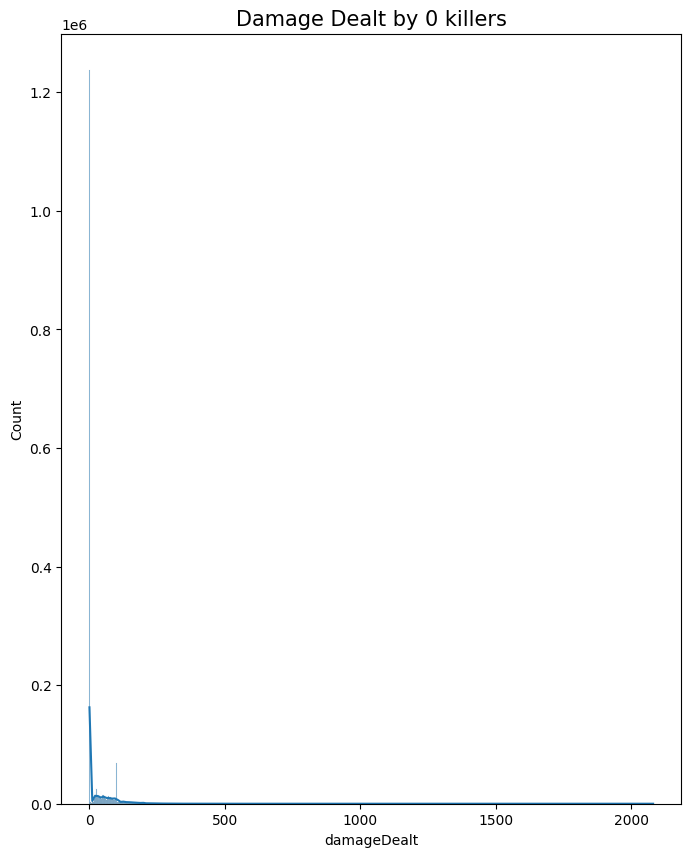

In [28]:
data = train.copy()
data = data[data['kills'] == 0]

plt.figure(figsize=(8, 10))
plt.title("Damage Dealt by 0 killers", fontsize=15)
sns.histplot(data['damageDealt'], kde=True) 
plt.show()
